In [1]:
import pandas as pd
import numpy as np
from itertools import product

import oracles
import optimization
from optimization import lbfgs

Загрузим данные

In [2]:
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/gisette_scale.bz2
!bzip2 -d gisette_scale.bz2

--2022-03-13 14:58:42--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/gisette_scale.bz2
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21902461 (21M) [application/x-bzip2]
Saving to: ‘gisette_scale.bz2’

gisette_scale.bz2   100%[===================>]  20.89M  8.55MB/s    in 2.4s    

2022-03-13 14:58:45 (8.55 MB/s) - ‘gisette_scale.bz2’ saved [21902461/21902461]

bzip2: Output file gisette_scale already exists.


In [2]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

data = ["gisette_scale"]

@mem.cache
def get_data(name):
    data = load_svmlight_file(name)
    return data[0], data[1]

for d in data:
    X, y = get_data(d)
    display(X)

<6000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 29729997 stored elements in Compressed Sparse Row format>

График со временем

In [3]:
import matplotlib.pyplot as plt 

def process_time(X, y, dataset):
  colors=['green', 'purple', 'darkred', 'red', 'blue', 'pink']
  oracle = oracles.create_log_reg_oracle(X, y, 1. / X.shape[1])
  x_0 = np.zeros(X.shape[1])
  size = [0, 1, 5, 10, 50, 100]
  fig, ax = plt.subplots(figsize=(12, 8))
  lab = 'Зависимость относительного квадрата нормы градиента против реального времени работы'
  plt.xlabel('Время (секунды)', fontsize=15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel('Логарифм относительного квадрата нормы', fontsize=15)
  plt.yscale('log')
  plt.title(lab, fontsize=15)

  for i, l in enumerate(size):
    x_opt, message, history = lbfgs(oracle, x_0, memory_size=l, trace=True)
    ax.plot(history['time'], (history['grad_norm'] / history['grad_norm'][0])**2, 
            label=f'l = {l}', color=colors[i])
           
  ax.legend(fontsize=12)
  ax.grid()
  name = "lbfgs_time"
  plt.savefig(name, bbox_inches="tight")
  plt.show()


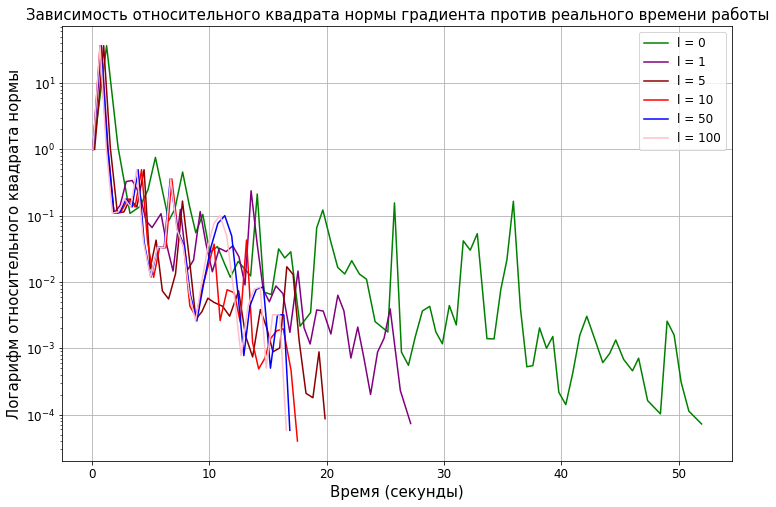

In [4]:
X, y = get_data("gisette_scale")
process_time(X, y, "gisette_scale")

График с итерациями

In [6]:
def process_iter(X, y, dataset):
  colors=['green', 'purple', 'darkred', 'red', 'blue', 'pink']
  oracle = oracles.create_log_reg_oracle(X, y, 1. / X.shape[1])
  x_0 = np.zeros(X.shape[1])
  size = [0, 1, 5, 10, 50, 100]
  fig, ax = plt.subplots(figsize=(12, 8))
  for i, l in enumerate(size):
    x_opt, message, history = lbfgs(oracle, x_0, memory_size=l, trace=True)
    ax.plot((history['grad_norm'] / history['grad_norm'][0])**2, 
            label=f'l = {l}', color=colors[i])
           
  lab = 'Зависимость относительного квадрата нормы градиента против номера итерации метода'
  plt.xlabel('Итерация', fontsize=15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel('Логарифм относительного квадрата нормы', fontsize=15)
  plt.yscale('log')
  plt.title(lab, fontsize=15)
  ax.legend(fontsize=12)
  ax.grid()
  name = "lbfgs_iter"
  plt.savefig(name, bbox_inches="tight")
  plt.show()

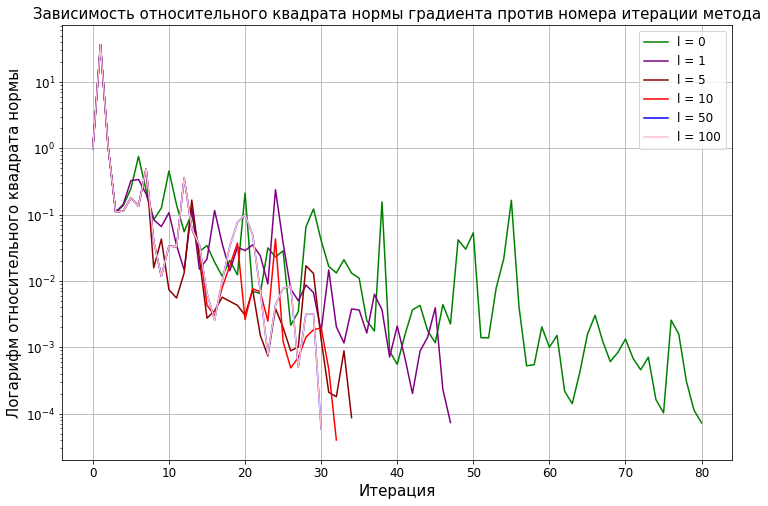

In [7]:
X, y = get_data("gisette_scale")
process_iter(X, y, "gisette_scale")